In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Omitted Variable Bias #

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


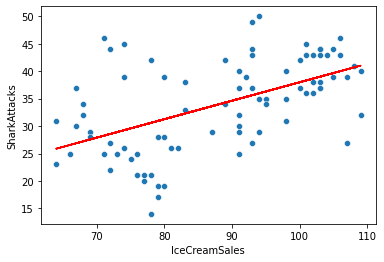

In [2]:
shark = pd.read_csv('http://uclspp.github.io/PUBLG100/data/shark_attacks.csv')
sns.scatterplot(shark['IceCreamSales'], shark['SharkAttacks'])
x1 = shark['IceCreamSales']
y1 = shark['SharkAttacks']
m1, b1 = np.polyfit(x1, y1, 1)
plt.plot(x1, m1*x1+b1, color = 'red')

In [3]:
X = sm.add_constant(shark[['IceCreamSales']])
y = shark['SharkAttacks']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SharkAttacks   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     32.77
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.65e-07
Time:                        00:06:00   Log-Likelihood:                -283.69
No. Observations:                  84   AIC:                             571.4
Df Residuals:                      82   BIC:                             576.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3523      5.238      0.831      0.408      -6.067      14.772
IceCreamSales     0.3363      0.059      5.725      0.000       0.219       0.453
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.423
Skew:                           0.161   Prob(JB):                        0.809
Kurtosis:                       2.871   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
shark.corr()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
Year,1.000000,0.000000,-0.033364,0.010930,0.013402
Month,0.000000,1.000000,0.275968,0.270830,-0.261145
SharkAttacks,-0.033364,0.275968,1.000000,0.716966,0.534358
Temperature,0.010930,0.270830,0.716966,1.000000,0.595769
IceCreamSales,0.013402,-0.261145,0.534358,0.595769,1.000000


In [5]:
X = sm.add_constant(shark[['IceCreamSales', 'Temperature']])
y = shark['SharkAttacks']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SharkAttacks   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     46.01
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           4.47e-14
Time:                        00:06:00   Log-Likelihood:                -265.94
No. Observations:                  84   AIC:                             537.9
Df Residuals:                      81   BIC:                             545.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5651      4.305      0.131      0.896      -8.001       9.131
IceCreamSales     0.1046      0.060      1.756      0.083      -0.014       0.223
Temperature       1.2928      0.198      6.528      0.000       0.899       1.687
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   2.505
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.672
Skew:                           0.166   Prob(JB):                        0.263
Kurtosis:                       3.809   Cond. No.                         616.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of ice cream sales decreased and the pvalue increased to above .05 indicating that the IceCreamSales predictor is not statistically signficant with 95% confidence

# Perfect Multicollinearity #


In [6]:
shark['SalesNTax'] = shark['IceCreamSales'] * 1.25
shark.corr()

,Year,Month,SharkAttacks,Temperature,IceCreamSales,SalesNTax
Year,1.000000,0.000000,-0.033364,0.010930,0.013402,0.013402
Month,0.000000,1.000000,0.275968,0.270830,-0.261145,-0.261145
SharkAttacks,-0.033364,0.275968,1.000000,0.716966,0.534358,0.534358
Temperature,0.010930,0.270830,0.716966,1.000000,0.595769,0.595769
IceCreamSales,0.013402,-0.261145,0.534358,0.595769,1.000000,1.000000
SalesNTax,0.013402,-0.261145,0.534358,0.595769,1.000000,1.000000


In [7]:
#just ice cream sales
X = sm.add_constant(shark[['IceCreamSales']])
y = shark['SharkAttacks']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SharkAttacks   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     32.77
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.65e-07
Time:                        00:06:00   Log-Likelihood:                -283.69
No. Observations:                  84   AIC:                             571.4
Df Residuals:                      82   BIC:                             576.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3523      5.238      0.831      0.408      -6.067      14.772
IceCreamSales     0.3363      0.059      5.725      0.000       0.219       0.453
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.423
Skew:                           0.161   Prob(JB):                        0.809
Kurtosis:                       2.871   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#just sales and tax
X = sm.add_constant(shark[['SalesNTax']])
y = shark['SharkAttacks']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SharkAttacks   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     32.77
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.65e-07
Time:                        00:06:00   Log-Likelihood:                -283.69
No. Observations:                  84   AIC:                             571.4
Df Residuals:                      82   BIC:                             576.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3523      5.238      0.831      0.408      -6.067      14.772
SalesNTax      0.2690      0.047      5.725      0.000       0.176       0.362
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.423
Skew:                           0.161   Prob(JB):                        0.809
Kurtosis:                       2.871   Cond. No.                         746.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
X = sm.add_constant(shark[['IceCreamSales', 'SalesNTax']])
y = shark['SharkAttacks']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SharkAttacks   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     32.77
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.65e-07
Time:                        00:06:00   Log-Likelihood:                -283.69
No. Observations:                  84   AIC:                             571.4
Df Residuals:                      82   BIC:                             576.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3523      5.238      0.831      0.408      -6.067      14.772
IceCreamSales     0.1312      0.023      5.725      0.000       0.086       0.177
SalesNTax         0.1640      0.029      5.725      0.000       0.107       0.221
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.423
Skew:                           0.161   Prob(JB):                        0.809
Kurtosis:                       2.871   Cond. No.                     2.23e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.44e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Heteroskedasticity #

In [10]:
n = 100
x = 25*np.random.randn(n)
x = x[x > 0]
sigma = 2.5
noise = sigma*np.random.randn(len(x))

y = 280 + 3*x + noise*x
#y = 280 + 3*x + noise

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

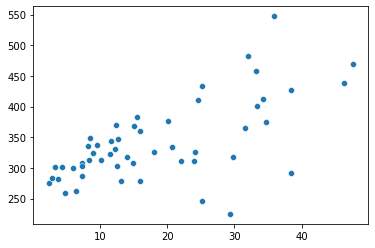

In [11]:
sns.scatterplot(x, y)

In [12]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     33.50
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           4.67e-07
Time:                        00:06:00   Log-Likelihood:                -276.83
No. Observations:                  52   AIC:                             557.7
Df Residuals:                      50   BIC:                             561.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        278.3739     12.896     21.587      0.000     252.472     304.275
x1             3.4079      0.589      5.788      0.000       2.225       4.591
==============================================================================
Omnibus:                        7.662   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.022   Jarque-Bera (JB):               10.695
Skew:                          -0.393   Prob(JB):                      0.00476
Kurtosis:                       5.078   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

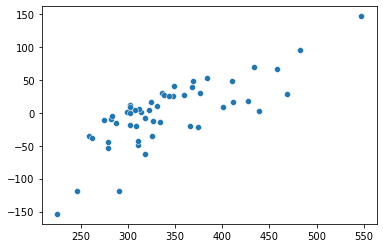

In [13]:
y_pred = model.predict(X)
sns.scatterplot(y,y-y_pred)

In [14]:
model = sm.RLM(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   52
Model:                            RLM   Df Residuals:                       50
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 04 Apr 2022                                         
Time:                        00:06:00                                         
No. Iterations:                    12                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        278.5282     10.329     26.965      0.000     258.283     298.773
x1             3.5157      0.472      7.454      0.000       2.591       4.440
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

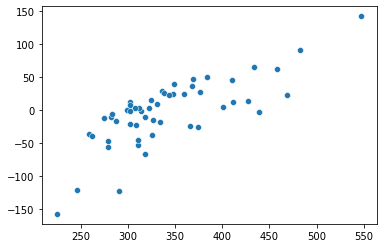

In [15]:
y_pred = model.predict(X)
sns.scatterplot(y,y-y_pred)

# Nonlinearity #

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

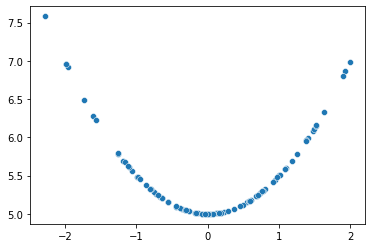

In [16]:
#True form of exponential data
n = 100
x = np.random.randn(n)
ytrue = 5 + 0.5*x**2

sns.scatterplot(x, ytrue)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

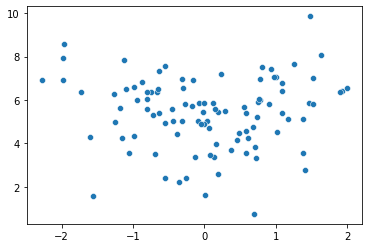

In [17]:
#noisy form of exponential data
noise = 1.5*np.random.randn(n)
ynoise = ytrue+noise

sns.scatterplot(x, ynoise)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


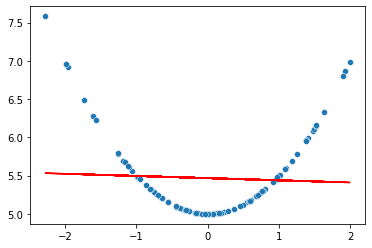

In [18]:
#True form linear regression
sns.scatterplot(x, ytrue)
m, b = np.polyfit(x, ytrue, 1)
plt.plot(x, m*x+b, color = 'r')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


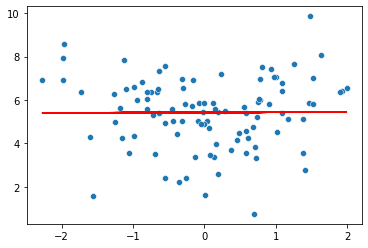

In [19]:
#noisy form linear regression
sns.scatterplot(x, ynoise)
m, b = np.polyfit(x, ynoise, 1)
plt.plot(x, m*x+b, color = 'r')

In [20]:
X = sm.add_constant(x)
model = sm.OLS(ynoise, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.003742
Date:                Mon, 04 Apr 2022   Prob (F-statistic):              0.951
Time:                        00:06:01   Log-Likelihood:                -189.58
No. Observations:                 100   AIC:                             383.2
Df Residuals:                      98   BIC:                             388.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4266      0.163     33.319      0.000       5.103       5.750
x1             0.0103      0.169      0.061      0.951      -0.324       0.345
==============================================================================
Omnibus:                        3.473   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                2.841
Skew:                          -0.384   Prob(JB):                        0.242
Kurtosis:                       3.302   Cond. No.                         1.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

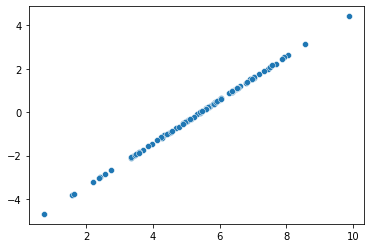

In [21]:
#check for nonlinearity using residual plot
y_pred = model.predict(X)
sns.scatterplot(ynoise,ynoise-y_pred)
#if there is a pattern then there's a problem!